In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

# Getting the data

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=False, drop_last=True)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=False, drop_last=True)

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.shape)
print(images[0])

# Specifying the model architecture

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 25, 12, stride=2, padding=0)
        self.conv2 = nn.Conv2d(25, 64, 5, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64*2*2, 1024)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64*2*2)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.softmax(self.fc2(x))

        return x


net = Net()

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9)

# Defining the training loop

In [21]:
def train(net, nb_epochs, optimizer):
    for epoch in range(nb_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        
            running_loss += loss.item()
        
            if i % 500 == 499:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 500))
                running_loss = 0.0
            
    print('Finished training')

# Training and testing the model

In [17]:
# Train for 25 epochs
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
train(net, 25, optimizer)
print(test_accuracy(net))

<ipython-input-3-8700678e87a4>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


[1,   500] loss: 2.302
[1,  1000] loss: 2.300
[2,   500] loss: 2.297
[2,  1000] loss: 2.293
[3,   500] loss: 2.251
[3,  1000] loss: 2.077
[4,   500] loss: 1.799
[4,  1000] loss: 1.764
[5,   500] loss: 1.738
[5,  1000] loss: 1.695
[6,   500] loss: 1.664
[6,  1000] loss: 1.658
[7,   500] loss: 1.646
[7,  1000] loss: 1.643
[8,   500] loss: 1.589
[8,  1000] loss: 1.578
[9,   500] loss: 1.564
[9,  1000] loss: 1.561
[10,   500] loss: 1.553
[10,  1000] loss: 1.551
[11,   500] loss: 1.542
[11,  1000] loss: 1.543
[12,   500] loss: 1.536
[12,  1000] loss: 1.536
[13,   500] loss: 1.530
[13,  1000] loss: 1.532
[14,   500] loss: 1.525
[14,  1000] loss: 1.527
[15,   500] loss: 1.522
[15,  1000] loss: 1.523
[16,   500] loss: 1.518
[16,  1000] loss: 1.521
[17,   500] loss: 1.515
[17,  1000] loss: 1.517
[18,   500] loss: 1.513
[18,  1000] loss: 1.514
[19,   500] loss: 1.510
[19,  1000] loss: 1.512
[20,   500] loss: 1.508
[20,  1000] loss: 1.510
[21,   500] loss: 1.506
[21,  1000] loss: 1.508
[22,   500

In [20]:
torch.save(net_new.state_dict(), './mnist_pytorch_lrhigh_25e.pth')

In [15]:
torch.save(net.state_dict(), './mnist_pytorch_100e.pth')

In [7]:
# testing the model
def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Accuracy over number of epochs

In [ ]:
accuracies = []
for nb_epochs in range(1, 36, 5):
    net = Net()
    optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
    train(net, nb_epochs, optimizer)
    acc = test_accuracy(net)
    accuracies.append((nb_epochs, acc))

In [23]:
print(accuracies)

[(1, 26.906666666666666), (6, 82.37666666666667), (11, 85.31333333333333), (16, 94.98166666666667), (21, 95.75), (26, 96.30333333333333), (31, 96.89166666666667)]


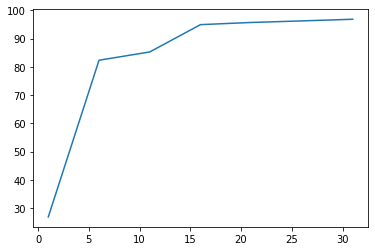

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot([x for x,_ in accuracies], [y for _,y in accuracies])